# Домашнее задание 2 — Зиновьев Максим

## Содержание:
1. Выгрузка ленты пользователя ВКонтакте по ID и запись ее в CSV-файл
2. Построение гистограмм по метрикам авторов ВКонтакте

## Пример выгрузки данных из VK API и запись в CSV
Импортирую необходимые библиотеки:

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ключ от API сохранил в отдельном файле, чтобы не демонстрировать его публично

In [5]:
with open("C:/Jupyter_Notebooks/token.txt") as f:
  token = f.read()

Для удобства выгрузки данных написал функцию для выполнения http-запросов к VK API

In [6]:
def wallGet(owner_id, offset):
    version = '5.199'
    url = 'https://api.vk.com/method/wall.get?owner_id=' + str(owner_id) + '&count=100&offset=' + str(offset) + '&v=' + version + '&access_token=' +  token
    response = requests.get(url)
    return response.json().get('response')

Создал Python-словарь, чтобы наполнить его данными запросов и преобразовать в Pandas-датафрейм

In [35]:
feed = {
        'post_id': [],
        'text': [],
        'likes': [],
        'comments': [],
        'views': []
    }

Написал код для записи 100 последних постов из группы ВКонтакте в **CSV-файл**. Для примера можно ввести ```91031095```

In [ ]:
group_id = input("Введите ID группы, стену которой хотите выгрузить")

wall = wallGet('-' + str(group_id), 0)

if wall != None:
    wall = wall['items']
    feed['post_id'].extend([post.get('id') for post in wall])      
    feed['text'].extend([post.get('text') for post in wall])         
    feed['likes'].extend([post.get('likes').get('count') if post.get('likes') != None else None for post in wall])         
    feed['comments'].extend([post.get('comments').get('count') if post.get('comments') != None else None for post in wall])       
    feed['views'].extend([post.get('views').get('count') if post.get('views') != None else None for post in wall])

df = pd.DataFrame(feed, index = feed['post_id'])
df.to_csv('Лента_' + group_id)

Считаем записанный файл

In [49]:
df = pd.read_csv("C:/Users/zinov/Jupyter_Notebook/Лента_91031095", index_col = 'post_id')

In [51]:
df

,text,likes,comments,views
post_id,,,,
74151,"«Никто не воспринимал всерьез то, что я делал,...",28,1,894
74140,#юмор #математика,9,1,1950
74115,#задача #математика #геометрия,33,24,4875
74101,#юмор #математика,19,7,2675
74097,В компьютерной гарфике для представления 3d об...,15,5,3292
...,...,...,...,...
72497,#юмор #математика,61,8,6524
72475,Как решать такие уравнения?\n#задача #математика,69,43,8693
72467,#юмор #математика,61,3,5689


Построим гистограмму распределения каждой метрики качества для данной группы ВКонткте

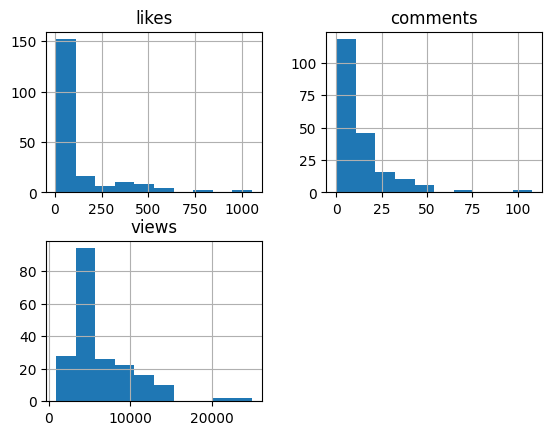

In [53]:
df.hist();